# **Imports**

In [ ]:
from bs4 import BeautifulSoup as bs4
from requests import get
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
%matplotlib inline
#from fake_useragent import UserAgent

# **Data preparation (Web scraping)**

Scraping data from the first website - 'FriendlyHousing'

In [ ]:
url_1 = 'https://www.friendlyhousing.nl/nl/aanbod/kamer'
url_2 = 'https://www.friendlyhousing.nl/nl/aanbod/studio'
url_3 = 'https://www.friendlyhousing.nl/nl/aanbod/appartement'
urls= [url_1, url_2, url_3]

Scraping data from the second website - 'Pararius'

In [ ]:
url_1p = 'https://www.pararius.com/apartments/eindhoven'
url_2p = 'https://www.pararius.com/apartments/eindhoven/page-2'
url_3p = 'https://www.pararius.com/apartments/eindhoven/page-3'
urls_p= [url_1p, url_2p, url_3p]


'FriendlyHousing'

In [ ]:
#user_agent = UserAgent()
#headers={"user-agent": user_agent.chrome}
soup_array=[]
for url in urls:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array.append(soup)

'Pararius'

In [ ]:
soup_array_p=[]
for url in urls_p:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array_p.append(soup)

'FriendlyHousing' - finding the elements from the html file

In [ ]:
houses=[]
for s in soup_array:
    allHouses = s.find("ul", {"class": "list list-unstyled row equal-row"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "col-xs-12 col-sm-6 col-md-4 equal-col"}):
     # print(h)
      
      houses.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [ ]:
catalog=[]
for h in houses:
  #data['houses'].append({
      type__= h.find('div', class_= 'specs').text
      t = type__.split()
      type_=t[0]
      street_ = h.find('h3').text
      s = street_.split()
      street = s[0]
      address = h.find('p').text
      a = address.split()
      postcode = a[0]
      #city = a[2]
      price = h.find('div', class_= 'price').text
      vars = type_,street, postcode, price
      catalog.append(vars)
      #print(city)

'Pararius' - finding the elements from the html file

In [ ]:
houses_p=[]
for s in soup_array_p:
    allHouses = s.find("ul", {"class": "search-list"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "search-list__item search-list__item--listing"}):
     # print(h)
      
      houses_p.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [ ]:
catalog_p=[]
for h in houses_p:
  #data['houses'].append({
        name = h.find('a',class_='listing-search-item__link listing-search-item__link--title').text
        _name = name.split()
        house_type = _name[0]
        street = _name[1]
        _address= h.findAll('div', class_='listing-search-item__location')[0].text
        #String manipulation to remove the unwanted signs from the address
        __address = _address.replace("\nnew\n ", "") 
        address = __address.replace("\n ", "")   #actual address after string manipulation - ready to be used in the exploring of the data
        new_address = address.split()
        postcode = new_address[0] 
        price_ = h.findAll('span', class_='listing-search-item__price')[0].text
        #splitting the string to find the price
        p=price_.split()
        _price = p[0] #actual price before string manipulation
        __price = _price.replace("€", "")  #actual price before full string manipulation
        price = __price.replace(",", "")   #actual price after string manipulation - ready to be used in the exploring of the data

        #finding the whole element from the web page
        ylr= h.findAll('section', class_= 'illustrated-features illustrated-features--vertical')[0].text 

        #splitting the string to find the living are, rooms and year
        lry= ylr.split()

        #living_area after taking the indexes that define it
        living_area = lry[0] 

        #rooms after taking the index that defines the variable
        rooms = lry[4] 
    
        vars = house_type, street, postcode,price,living_area,rooms
        catalog_p.append(vars)
    
print(catalog_p)


[('Apartment', 'Hoogstraat', '5654', '1190', '80', '3'), ('Apartment', 'Hermanus', '5611', '675', '20', '1'), ('Apartment', 'Genovevalaan', '5625', '1050', '54', '2'), ('Apartment', 'St', '5611', '1250', '75', '3'), ('House', 'Primulastraat', '5644', '2250', '162', '7'), ('Apartment', 'Distelstraat', '5643', '975', '55', '2'), ('Apartment', 'Kruisstraat', '5612', '1100', '46', '2'), ('Apartment', 'Emmasingel', '5611', '1749', '135', '3'), ('Apartment', 'Merovingersweg', '5616', '1195', '60', '2'), ('Apartment', 'Kruisstraat', '5612', '995', '55', '2'), ('Apartment', 'Kerkakkerstraat', '5616', '1115', '50', '2'), ('Apartment', 'Hoogstraat', '5654', '995', '50', '2'), ('Apartment', 'Genovevalaan', '5625', '1095', '65', '2'), ('Apartment', 'Geldropseweg', '5643', '990', '67', '2'), ('Apartment', 'Kromakkerweg', '5616', '1195', '75', '3'), ('Room', 'Musschenbroekstraat', '5621', '415', '13', '1'), ('Apartment', 'Fuutlaan', '5613', '1395', '79', '3'), ('House', 'Charlotte', '5611', '1995', 

'FriendlyHousing' - creating the dataframe

In [ ]:
dataframe = pd.DataFrame(catalog)
dataframe.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE'] 
dataframe 

,TYPE,STREET NAME,POSTCODE,PRICE
0,Kamer,Willem,5611,320
1,Kamer,Willem,5611,310
2,Kamer,Willem,5611,325
3,Kamer,Leenderweg,5643,580
4,Kamer,Jacob,5622,335
...,...,...,...,...
121,Appartement,Frankrijkstraat,5622,925
122,Appartement,Kerkakkerstraat,5616,950
123,Appartement,Leenderweg,5614,800
124,Appartement,Leostraat,5615,775


'Pararius'- creating the dataframe

In [ ]:
df_ = pd.DataFrame(catalog_p)
df_.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE','LIVING_AREA', 'ROOMS'] 
df_ 

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Apartment,Hoogstraat,5654,1190,80,3
1,Apartment,Hermanus,5611,675,20,1
2,Apartment,Genovevalaan,5625,1050,54,2
3,Apartment,St,5611,1250,75,3
4,House,Primulastraat,5644,2250,162,7
...,...,...,...,...,...,...
88,Apartment,Kruisstraat,5612,1000,45,2
89,Apartment,Morsestraat,5621,675,30,1
90,Apartment,Paradijslaan,5611,1245,110,3
91,Apartment,Kromakkerweg,5616,1175,65,2


# **Data integration**



> Using `Union` to integrate the scraped data from the three web pages.



In [ ]:
frames = [dataframe, df_]

In [ ]:
df = pd.concat(frames)
df

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Willem,5611,325,NaN,NaN
3,Kamer,Leenderweg,5643,580,NaN,NaN
4,Kamer,Jacob,5622,335,NaN,NaN
...,...,...,...,...,...,...
88,Apartment,Kruisstraat,5612,1000,45,2
89,Apartment,Morsestraat,5621,675,30,1
90,Apartment,Paradijslaan,5611,1245,110,3
91,Apartment,Kromakkerweg,5616,1175,65,2


# **Data analysis**

Here we can see the shape of our data with the .shape. Here we see that we have 182 rows and 7 columns. However, the rows are always changing because the data is always up to date by using the web scraping technique.



Checking the dimension of the dataset





In [ ]:
df.shape

(219, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 92
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPE         219 non-null    object
 1   STREET NAME  219 non-null    object
 2   POSTCODE     219 non-null    object
 3   PRICE        219 non-null    object
 4   LIVING_AREA  93 non-null     object
 5   ROOMS        93 non-null     object
dtypes: object(6)
memory usage: 12.0+ KB


In [ ]:
df.describe()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
count,219,219,219,219,93,93
unique,6,105,23,112,53,6
top,Apartment,Philitelaan,5611,415,50,2
freq,80,11,38,15,9,36


In [ ]:
df.head()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Willem,5611,325,NaN,NaN
3,Kamer,Leenderweg,5643,580,NaN,NaN
4,Kamer,Jacob,5622,335,NaN,NaN


In [ ]:
df.tail()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
88,Apartment,Kruisstraat,5612,1000,45,2
89,Apartment,Morsestraat,5621,675,30,1
90,Apartment,Paradijslaan,5611,1245,110,3
91,Apartment,Kromakkerweg,5616,1175,65,2
92,Apartment,Kleine,5611,1050,45,2


In [ ]:
df.iloc[0]

TYPE            Kamer
STREET NAME    Willem
POSTCODE         5611
PRICE             320
LIVING_AREA       NaN
ROOMS             NaN
Name: 0, dtype: object

In [ ]:
df.groupby('POSTCODE').count()

,TYPE,STREET NAME,PRICE,LIVING_AREA,ROOMS
POSTCODE,,,,,
5503,1,1,1,0,0
5611,38,38,38,21,21
5612,27,27,27,10,10
5613,9,9,9,4,4
5614,16,16,16,4,4
5615,11,11,11,4,4
5616,11,11,11,7,7
5617,11,11,11,11,11
5621,10,10,10,3,3


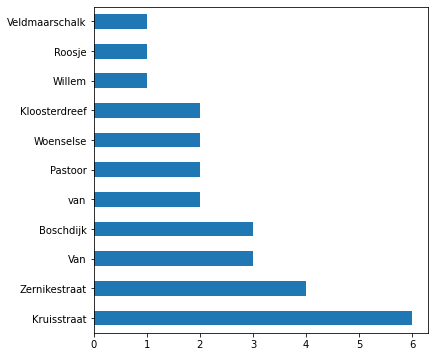

In [ ]:
df[(df['POSTCODE'] == '5612')]['STREET NAME'].value_counts().plot(kind='barh', figsize=(6, 6))

In [ ]:
df.sort_values('TYPE', ascending = True)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
92,Apartment,Kleine,5611,1050,45,2
25,Apartment,Philitelaan,5617,940,52,1
26,Apartment,Philitelaan,5617,1200,72,3
27,Apartment,Philitelaan,5617,800,45,1
28,Apartment,Philitelaan,5617,1200,73,3
...,...,...,...,...,...,...
64,Studio,Woenselsestraat,5623,520,NaN,NaN
66,Studio,Heistraat,5614,550,NaN,NaN
67,Studio,Boschdijk,5612,570,NaN,NaN
69,Studio,Hendrik,5616,655,NaN,NaN


There are no missing values in the dataset.

In [ ]:
df.isnull().sum()

TYPE             0
STREET NAME      0
POSTCODE         0
PRICE            0
LIVING_AREA    126
ROOMS          126
dtype: int64

In [ ]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
ROOMS,126,57.53
LIVING_AREA,126,57.53


In [ ]:
df.replace(np.nan,0)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,0,0
1,Kamer,Willem,5611,310,0,0
2,Kamer,Willem,5611,325,0,0
3,Kamer,Leenderweg,5643,580,0,0
4,Kamer,Jacob,5622,335,0,0
...,...,...,...,...,...,...
88,Apartment,Kruisstraat,5612,1000,45,2
89,Apartment,Morsestraat,5621,675,30,1
90,Apartment,Paradijslaan,5611,1245,110,3
91,Apartment,Kromakkerweg,5616,1175,65,2



**Pre Processing**

Handling Outlier

> An **outlier** is a data point in a data set that is distant from all other observations (a data point that lies outside the overall distribution of the dataset.)

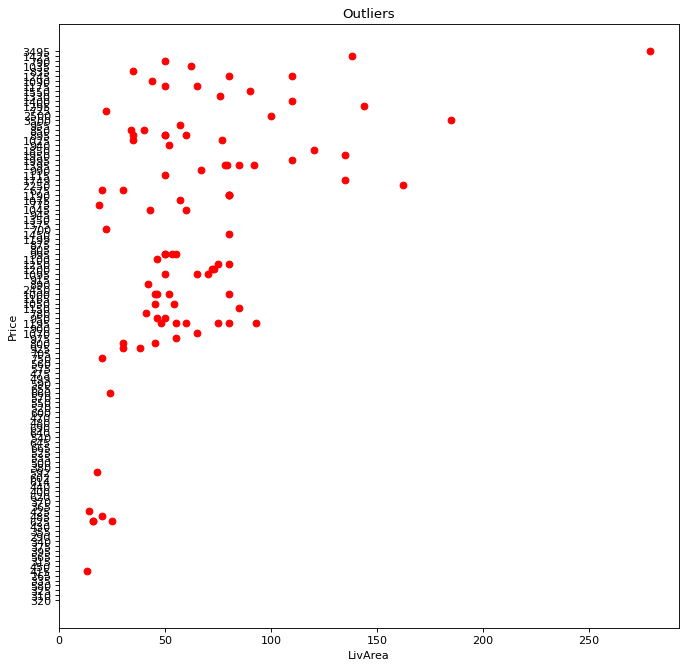

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(df.LIVING_AREA, df.PRICE, c= 'red')
plt.title("Outliers")
plt.xlabel("LivArea")
plt.ylabel("Price")
plt.show()

In [ ]:
df['PRICE'] =df['PRICE'].astype(float)

<function matplotlib.pyplot.show>

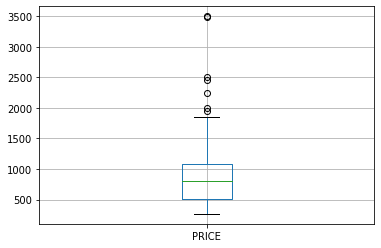

In [ ]:
df.boxplot(column=['PRICE'])
plt.show

<function seaborn.utils.despine>

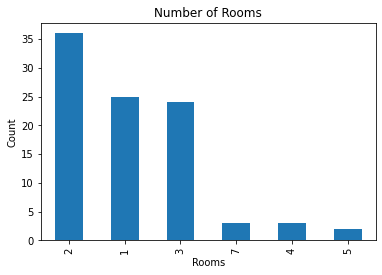

In [ ]:
df['ROOMS'].value_counts().plot(kind='bar')
plt.title('Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

In [ ]:
print(df['PRICE'])

0      320.0
1      310.0
2      325.0
3      580.0
4      335.0
       ...  
88    1000.0
89     675.0
90    1245.0
91    1175.0
92    1050.0
Name: PRICE, Length: 219, dtype: float64


In [ ]:
df.fillna(0)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320.0,0,0
1,Kamer,Willem,5611,310.0,0,0
2,Kamer,Willem,5611,325.0,0,0
3,Kamer,Leenderweg,5643,580.0,0,0
4,Kamer,Jacob,5622,335.0,0,0
...,...,...,...,...,...,...
88,Apartment,Kruisstraat,5612,1000.0,45,2
89,Apartment,Morsestraat,5621,675.0,30,1
90,Apartment,Paradijslaan,5611,1245.0,110,3
91,Apartment,Kromakkerweg,5616,1175.0,65,2


In [ ]:
df['PRICE'] =df['PRICE'].astype(float)
df['POSTCODE'] =df['POSTCODE'].astype(int)
num_liv = {'No information': 0}
df['LIVING_AREA'] = df['LIVING_AREA'].map(num_liv)
df['LIVING_AREA'] =df['LIVING_AREA'].astype(float)
num_rooms = {'No information': 0}
df['ROOMS'] = df['ROOMS'].map(num_rooms)
df['ROOMS'] =df['ROOMS'].astype(float)
code_numeric = {'Apartment': 1, 'Room': 2, 'Studio': 4, 'House': 3}
df ['TYPE'] = df['TYPE'].map(code_numeric)
df['TYPE'] =df['TYPE'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 92
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         131 non-null    float64
 1   STREET NAME  219 non-null    object 
 2   POSTCODE     219 non-null    int64  
 3   PRICE        219 non-null    float64
 4   LIVING_AREA  0 non-null      float64
 5   ROOMS        0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.0+ KB


Examining the data distributions of the features. We will start with the target variable, `PRICE`, to make sure it's normally distributed.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


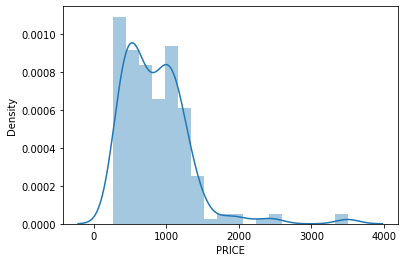

In [ ]:
sns.distplot(df['PRICE'])



> We can see that the `PRICE` distribution is not skewed, but normally distributed.


> **Normally distributed** means that the data is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 







Reviewing the skewness of each feature

In [ ]:
df.skew().sort_values(ascending=False)

PRICE          2.226649
ROOMS          0.000000
LIVING_AREA    0.000000
POSTCODE      -0.879142
TYPE                NaN
dtype: float64



>Values closer to zero are less skewed. The results show some features having a positive (right-tailed) or negative (left-tailed) skew.





Factor plot is informative when we have multiple groups to compare. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

415.0     15
1195.0     7
995.0      5
625.0      5
1000.0     5
          ..
2250.0     1
1995.0     1
1425.0     1
1035.0     1
320.0      1
Name: PRICE, Length: 112, dtype: int64

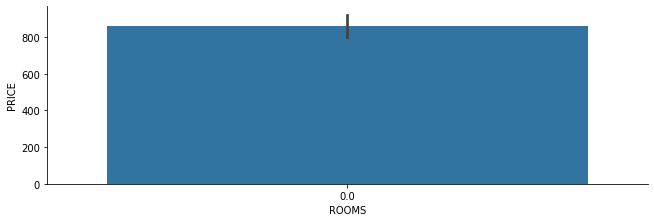

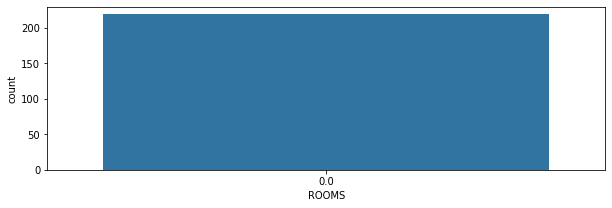

In [ ]:
sns.factorplot('ROOMS', 'PRICE', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('ROOMS', data=df)
df['PRICE'].value_counts()

> Real estate with 5 rooms has the  highest `Price` while the sales of others with rooms of 2 is the most sold ones.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


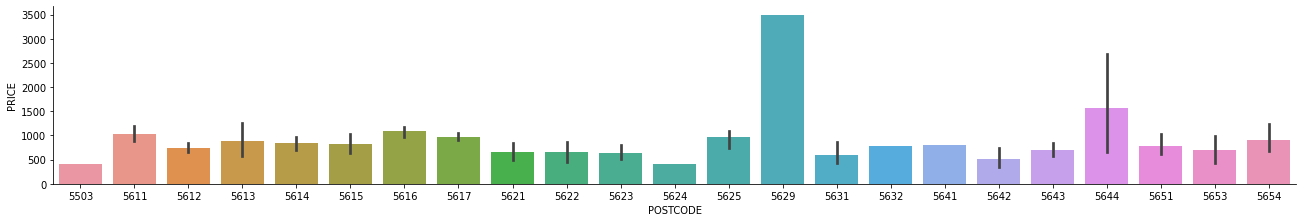

In [ ]:
#g = sns.factorplot(x='POSTCODE', y='Skewed_SP', col='PRICE', data=df, kind='bar', col_wrap=4, aspect=0.8)
sns.factorplot('POSTCODE', 'PRICE', data=df,kind='bar',size=3,aspect=6)


>The diagram represents the `price` of a rpoperty, depending on its `postcode`.




# **Train-Test Split dataset**


> Necessary imports

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
df["TYPE"].fillna("No type", inplace = True)  
df["LIVING_AREA"].fillna("No information", inplace = True)  
df["ROOMS"].fillna("No information", inplace = True)  


In [ ]:
df

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,No type,Willem,5611,320.0,0.0,0.0
1,No type,Willem,5611,310.0,0.0,0.0
2,No type,Willem,5611,325.0,0.0,0.0
3,No type,Leenderweg,5643,580.0,0.0,0.0
4,No type,Jacob,5622,335.0,0.0,0.0
...,...,...,...,...,...,...
88,No type,Kruisstraat,5612,1000.0,0.0,0.0
89,No type,Morsestraat,5621,675.0,0.0,0.0
90,No type,Paradijslaan,5611,1245.0,0.0,0.0
91,No type,Kromakkerweg,5616,1175.0,0.0,0.0


In [ ]:
df.isnull().sum()

TYPE           0
STREET NAME    0
POSTCODE       0
PRICE          0
LIVING_AREA    0
ROOMS          0
dtype: int64

Analyzing the numeric features.


In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

In [ ]:
numeric_features.columns

Index(['POSTCODE', 'PRICE', 'LIVING_AREA', 'ROOMS'], dtype='object')

In [ ]:
df.fillna(0)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,No type,Willem,5611,320.0,0.0,0.0
1,No type,Willem,5611,310.0,0.0,0.0
2,No type,Willem,5611,325.0,0.0,0.0
3,No type,Leenderweg,5643,580.0,0.0,0.0
4,No type,Jacob,5622,335.0,0.0,0.0
...,...,...,...,...,...,...
88,No type,Kruisstraat,5612,1000.0,0.0,0.0
89,No type,Morsestraat,5621,675.0,0.0,0.0
90,No type,Paradijslaan,5611,1245.0,0.0,0.0
91,No type,Kromakkerweg,5616,1175.0,0.0,0.0


In [ ]:
df.isnull().sum()

TYPE           0
STREET NAME    0
POSTCODE       0
CITY           0
PRICE          0
LIVING_AREA    0
ROOMS          0
dtype: int64

In [ ]:
# set the target and predictors
y = df.PRICE  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["PRICE"],axis=1)  # predictors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **Modelling**


**Linear Regression**



In [ ]:
lr = LinearRegression()
# fit optimal linear regression line on training data
lr.fit((X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict y_values using X_test set
yr_hat = lr.predict(X_test)

In [ ]:
lr_score =lr.score((X_test),y_test)
print("Accuracy: ", lr_score)

Accuracy:  -0.030737071420210427


Using cross-validation to see whether the model is over-fitting the data.

In [ ]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [-54.56238957 -12.88911622  -0.6202764   -0.65686259  -0.31908302]
R2:  -13.809545559713982


**Random Forest**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  -15.452762672251945


In [ ]:
rfr.feature_importances_

array([1., 0., 0.])

# **Plotting the Feature Importance**

In [ ]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)

#list(feature_importances)
sorted_feature_importances = sorted(feature_importances, reverse = True)

#print(sorted_feature_importances)
top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['POSTCODE', 'ROOMS', 'LIVING_AREA']


**Plotting the feauture importance of the Random forest.**

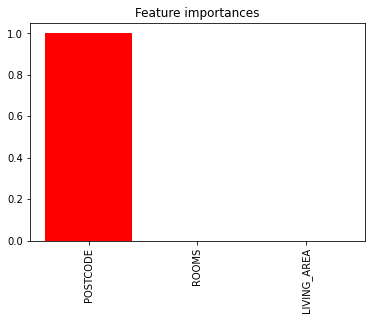

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

# **Conclusion**
**Data collection:**

For the data collection part, I decided to use `web scraping` as e technique because it gives the opportunity to work with a data set that is up to date and therefore, make more accurate summaries.

**Data preprocessing:**

I tried different types of data transfoms to expose the data structure better, so we may be able to improve model accuracy later.

*   `Standardizing` was made to the data set so as to reduce the effects of differing distributions.
*   `The skewness` of the feautures was checked in order to see how distorted a data sample is from the normal distribution.
* `Rescaling (normalizing)` the dataset was also included to reduce the effects of differing scales

**Modelling:**

I used two models to determine the accuracy - Linear Regression and Random Forest.

Linear Regression turns out to be the more accurate model for predicting the house price. It scored an estimated accuracy of 75%, out performing the Random Forest. Random Forest determined that overall the living area of a home is by far the most important predictor. Following are the size of above rooms and postcode.


